In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Lets Look Our Data and Select our Features for Regression

In [2]:
df = pd.read_csv("weather_data_Izmir.csv")
df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,İL,İLÇE
0,2021-05-01 00:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,...,58,0.0,1015,18,10,143,4,İZMİR-URLA,İZMİR,URLA
1,2021-05-01 01:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,...,58,0.0,1015,18,10,139,5,İZMİR-URLA,İZMİR,URLA
2,2021-05-01 02:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,...,58,0.0,1015,18,10,135,5,İZMİR-URLA,İZMİR,URLA
3,2021-05-01 03:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,...,58,0.0,1015,18,10,131,5,İZMİR-URLA,İZMİR,URLA
4,2021-05-01 04:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,...,57,0.0,1015,18,10,131,5,İZMİR-URLA,İZMİR,URLA


In [3]:
df.rename({"İL" : "City" , "İLÇE" : "SubCity"},axis=1 , inplace=True)
df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,City,SubCity
0,2021-05-01 00:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,...,58,0.0,1015,18,10,143,4,İZMİR-URLA,İZMİR,URLA
1,2021-05-01 01:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,...,58,0.0,1015,18,10,139,5,İZMİR-URLA,İZMİR,URLA
2,2021-05-01 02:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,...,58,0.0,1015,18,10,135,5,İZMİR-URLA,İZMİR,URLA
3,2021-05-01 03:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,...,58,0.0,1015,18,10,131,5,İZMİR-URLA,İZMİR,URLA
4,2021-05-01 04:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,...,57,0.0,1015,18,10,131,5,İZMİR-URLA,İZMİR,URLA


In [4]:
df.shape

(525960, 27)

In [5]:
df.isna().sum()

date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
location             0
City                 0
SubCity              0
dtype: int64

In [6]:
df.dtypes

date_time             object
maxtempC               int64
mintempC               int64
totalSnow_cm         float64
sunHour              float64
uvIndex                int64
moon_illumination      int64
moonrise              object
moonset               object
sunrise               object
sunset                object
DewPointC              int64
FeelsLikeC             int64
HeatIndexC             int64
WindChillC             int64
WindGustKmph           int64
cloudcover             int64
humidity               int64
precipMM             float64
pressure               int64
tempC                  int64
visibility             int64
winddirDegree          int64
windspeedKmph          int64
location              object
City                  object
SubCity               object
dtype: object

In [7]:
df["date_time"] = df["date_time"].astype("datetime64")
df.set_index("date_time" , drop=True , inplace=True)
df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,City,SubCity
date_time,,,,,,,,,,,,,,,,,,,,,
2021-05-01 00:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,08:04 PM,...,58,0.0,1015,18,10,143,4,İZMİR-URLA,İZMİR,URLA
2021-05-01 01:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,08:04 PM,...,58,0.0,1015,18,10,139,5,İZMİR-URLA,İZMİR,URLA
2021-05-01 02:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,08:04 PM,...,58,0.0,1015,18,10,135,5,İZMİR-URLA,İZMİR,URLA
2021-05-01 03:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,08:04 PM,...,58,0.0,1015,18,10,131,5,İZMİR-URLA,İZMİR,URLA
2021-05-01 04:00:00,26,18,0.0,11.6,6,70,12:19 AM,09:44 AM,06:16 AM,08:04 PM,...,57,0.0,1015,18,10,131,5,İZMİR-URLA,İZMİR,URLA


In [8]:
df.dtypes

maxtempC               int64
mintempC               int64
totalSnow_cm         float64
sunHour              float64
uvIndex                int64
moon_illumination      int64
moonrise              object
moonset               object
sunrise               object
sunset                object
DewPointC              int64
FeelsLikeC             int64
HeatIndexC             int64
WindChillC             int64
WindGustKmph           int64
cloudcover             int64
humidity               int64
precipMM             float64
pressure               int64
tempC                  int64
visibility             int64
winddirDegree          int64
windspeedKmph          int64
location              object
City                  object
SubCity               object
dtype: object

In [9]:
#df = df.drop(["moonrise","moonset","sunset", "sunrise","location","SubCity"] , axis=1)
df = df[["maxtempC","mintempC","totalSnow_cm","sunHour","FeelsLikeC" , "WindChillC" , "WindGustKmph", "humidity" , "tempC" , "winddirDegree" , "windspeedKmph"]]

df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,FeelsLikeC,WindChillC,WindGustKmph,humidity,tempC,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,
2021-05-01 00:00:00,26,18,0.0,11.6,18,18,9,58,18,143,4
2021-05-01 01:00:00,26,18,0.0,11.6,18,18,10,58,18,139,5
2021-05-01 02:00:00,26,18,0.0,11.6,18,18,10,58,18,135,5
2021-05-01 03:00:00,26,18,0.0,11.6,18,18,10,58,18,131,5
2021-05-01 04:00:00,26,18,0.0,11.6,18,18,10,57,18,131,5


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
maxtempC,525960.0,25.103901,10.394511,-6.0,17.0,26.0,34.0,46.0
mintempC,525960.0,13.581154,7.539377,-15.0,9.0,15.0,20.0,30.0
totalSnow_cm,525960.0,0.007867,0.150337,0.0,0.0,0.0,0.0,9.0
sunHour,525960.0,11.131403,2.743163,3.5,10.0,11.6,13.4,14.5
FeelsLikeC,525960.0,18.499382,10.719004,-19.0,11.0,19.0,26.0,50.0
WindChillC,525960.0,18.296696,10.574475,-19.0,11.0,19.0,26.0,46.0
WindGustKmph,525960.0,18.056462,11.276744,0.0,10.0,16.0,24.0,98.0
humidity,525960.0,55.609813,19.700833,6.0,41.0,57.0,71.0,100.0
tempC,525960.0,18.849019,9.795145,-15.0,12.0,19.0,26.0,46.0
winddirDegree,525960.0,145.464248,116.168903,0.0,30.0,130.0,247.0,360.0


# Lets look Graphs

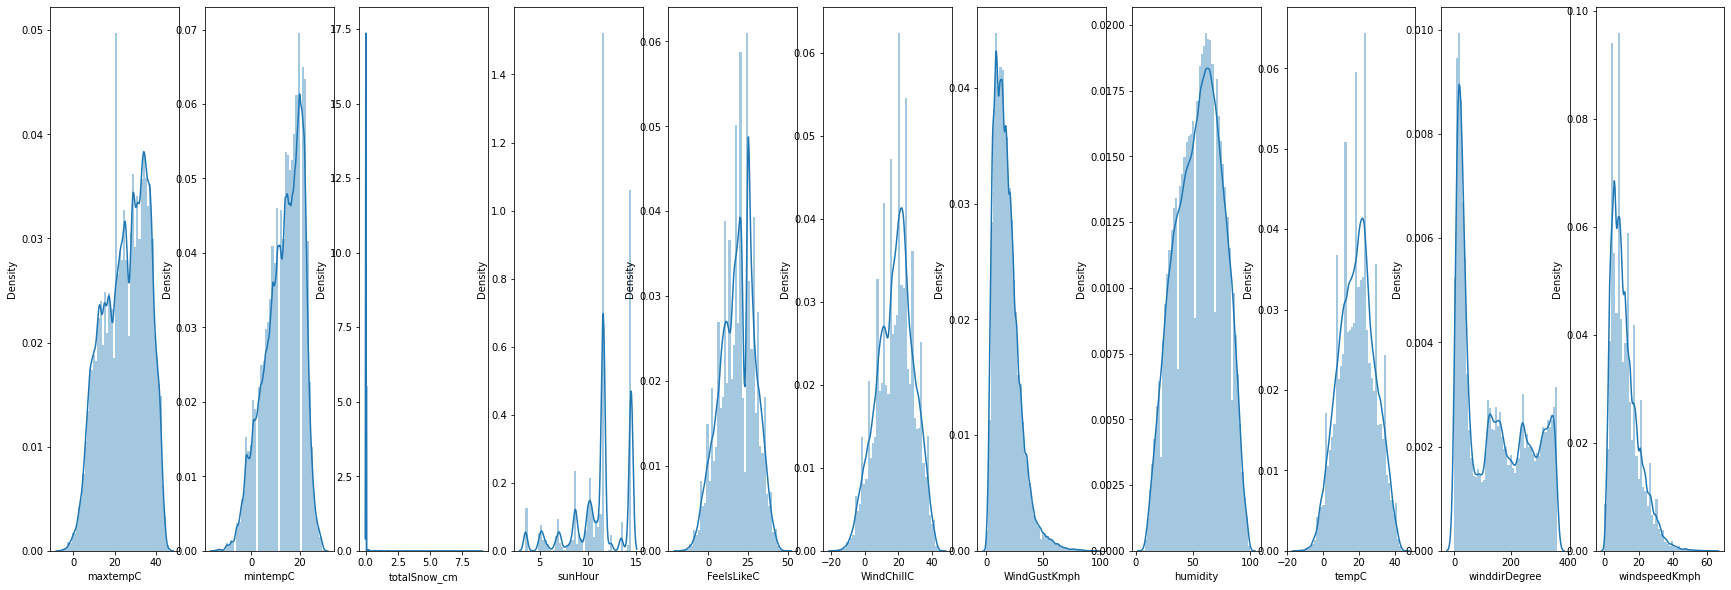

In [11]:
fig , ax = plt.subplots(1,11, figsize = (30,10))

index = 0
for i in df.columns:
    sns.distplot(df[i],ax = ax[index]);
    index += 1

In [12]:
df.windspeedKmph.sort_values(ascending=False).head(500)

date_time
2021-11-27 21:00:00    65
2021-11-27 21:00:00    65
2021-11-27 21:00:00    65
2022-04-01 12:00:00    64
2022-04-01 12:00:00    64
                       ..
2022-04-01 13:00:00    50
2021-11-27 22:00:00    50
2021-11-27 22:00:00    50
2022-01-12 12:00:00    50
2021-11-29 14:00:00    50
Name: windspeedKmph, Length: 500, dtype: int64

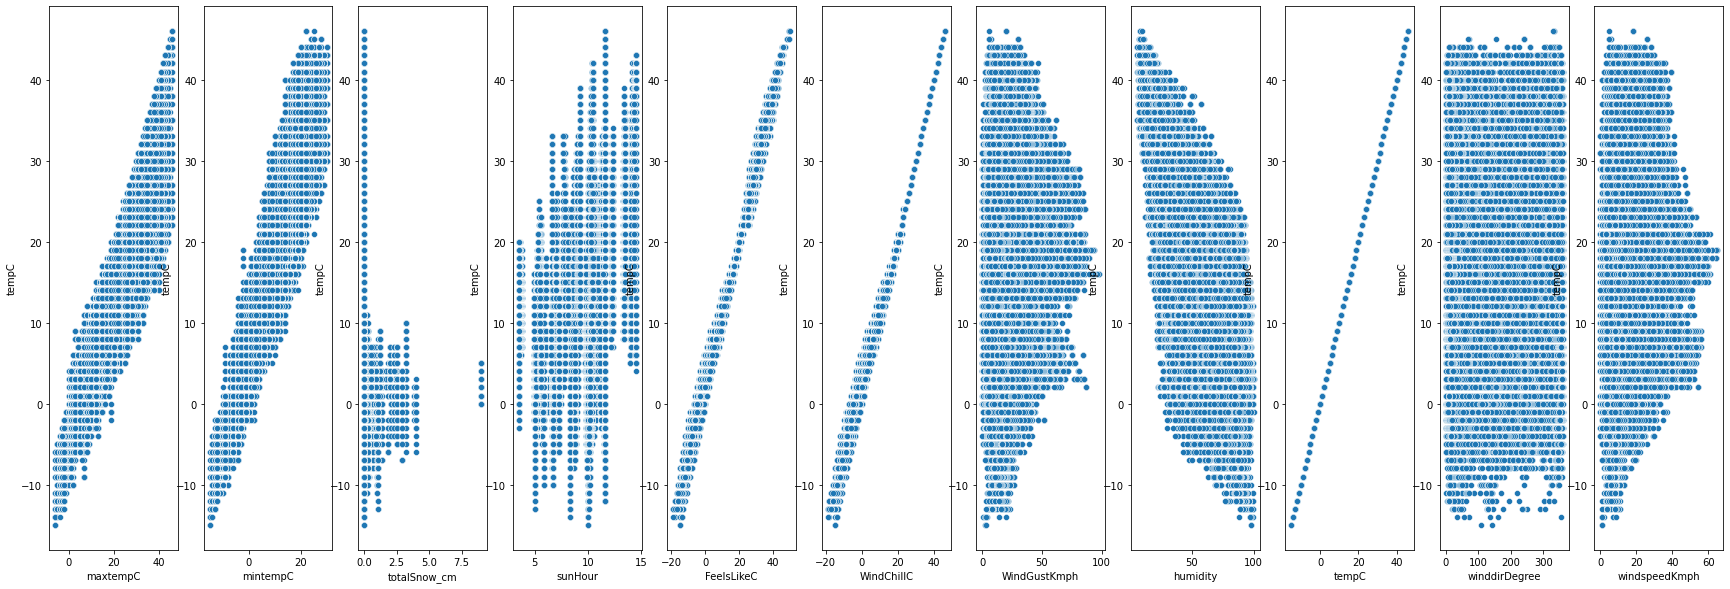

In [13]:
fig , ax = plt.subplots(1,11, figsize = (30,10))

index = 0
for i in df.columns:
    sns.scatterplot(x = df[i], y = df["tempC"] , ax = ax[index]);
    index += 1

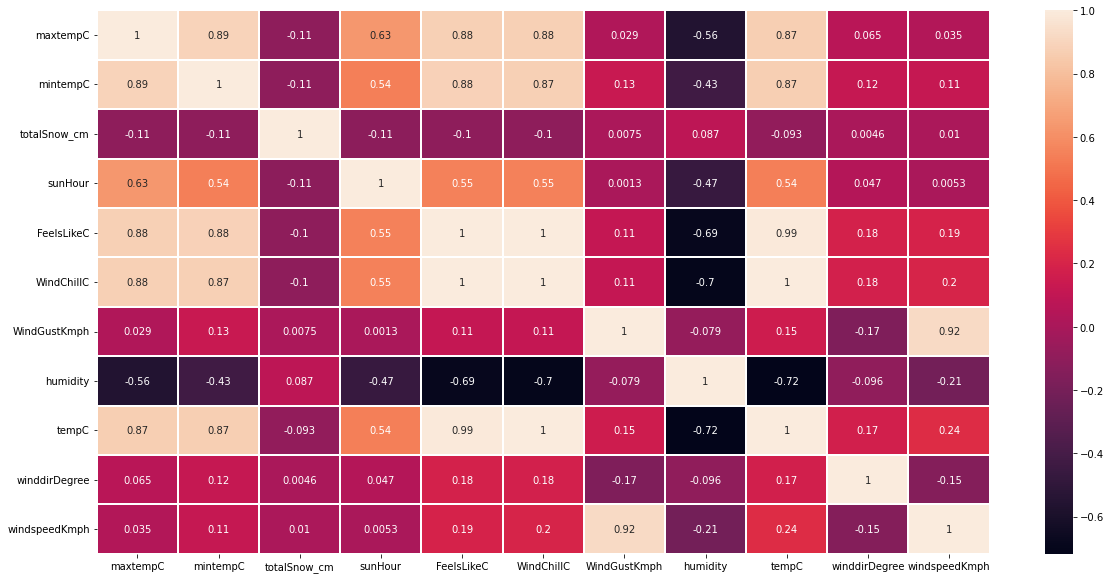

In [14]:
plt.figure(figsize = (20,10))

ax = sns.heatmap(df.corr(), annot=True, linewidths=.10)

In [15]:
#df.drop(["totalSnow_cm","FeelsLikeC","WindChillC"])

# Data Cleaning

In [16]:
df.shape[0] * 0.01

5259.6

In [17]:
df.sort_values("WindGustKmph" , ascending=False).head(5259) # We can drop them for better results.

,maxtempC,mintempC,totalSnow_cm,sunHour,FeelsLikeC,WindChillC,WindGustKmph,humidity,tempC,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,
2021-12-11 21:00:00,17,14,0.0,5.2,16,16,98,75,16,169,61
2021-12-11 21:00:00,17,14,0.0,5.2,16,16,98,75,16,169,61
2021-12-11 21:00:00,17,14,0.0,5.2,16,16,98,75,16,169,61
2021-12-11 22:00:00,17,14,0.0,5.2,16,16,96,74,16,172,60
2021-12-11 22:00:00,17,14,0.0,5.2,16,16,96,74,16,172,60
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-03 09:00:00,28,23,0.0,11.6,27,27,56,52,27,28,33
2021-12-12 06:00:00,16,14,0.0,3.5,16,16,56,77,16,192,40
2021-11-29 13:00:00,21,15,0.0,5.3,21,21,56,69,21,190,43


In [18]:
df = df.sort_values("WindGustKmph" , ascending=False).iloc[5259:]
df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,FeelsLikeC,WindChillC,WindGustKmph,humidity,tempC,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,
2021-12-12 06:00:00,16,14,0.0,3.5,16,16,56,77,16,192,40
2022-08-11 09:00:00,27,23,0.0,11.6,27,26,56,66,26,31,37
2022-03-22 16:00:00,11,5,0.0,11.6,6,6,56,50,10,31,40
2021-12-06 12:00:00,18,16,0.0,5.2,17,17,56,79,17,175,42
2021-11-30 10:00:00,16,12,0.0,5.3,14,14,56,66,15,231,43


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
maxtempC,520701.0,25.149771,10.413156,-6.0,17.0,26.0,34.0,46.0
mintempC,520701.0,13.562415,7.549185,-15.0,9.0,15.0,20.0,30.0
totalSnow_cm,520701.0,0.007927,0.150897,0.0,0.0,0.0,0.0,9.0
sunHour,520701.0,11.150226,2.726624,3.5,10.0,11.6,13.5,14.5
FeelsLikeC,520701.0,18.506959,10.735242,-19.0,11.0,19.0,26.0,50.0
WindChillC,520701.0,18.305505,10.592077,-19.0,11.0,19.0,26.0,46.0
WindGustKmph,520701.0,17.580615,10.256853,0.0,10.0,16.0,23.0,56.0
humidity,520701.0,55.552432,19.747118,6.0,40.0,57.0,71.0,100.0
tempC,520701.0,18.851264,9.819737,-15.0,12.0,19.0,26.0,46.0
winddirDegree,520701.0,145.837275,116.356371,0.0,30.0,130.0,248.0,360.0


In [20]:
for i in df.columns.drop("tempC"):
    print(f"Column Name is : {i}")
    print(df.groupby(i).mean().tempC)
    print("*" * 30)

Column Name is : maxtempC
maxtempC
-6    -11.416667
-5    -10.270833
-4     -7.866667
-3     -7.937500
-2     -5.072368
-1     -4.897059
 0     -3.482292
 1     -3.005208
 2     -1.376412
 3     -0.113832
 4      0.695324
 5      1.549345
 6      2.317014
 7      3.517511
 8      4.103536
 9      4.929496
 10     6.036062
 11     6.829492
 12     8.040292
 13     8.970884
 14     9.996432
 15    10.629322
 16    11.657933
 17    12.449735
 18    13.533807
 19    13.983618
 20    14.714939
 21    15.649219
 22    16.794759
 23    17.536124
 24    18.307079
 25    19.126392
 26    20.097021
 27    21.385634
 28    21.391123
 29    22.162253
 30    23.006464
 31    23.752017
 32    24.983894
 33    25.310989
 34    26.338881
 35    26.645482
 36    28.097502
 37    28.563649
 38    29.156808
 39    29.342915
 40    29.765268
 41    30.449454
 42    31.989645
 43    31.789080
 44    33.064935
 45    36.291667
 46    31.993056
Name: tempC, dtype: float64
******************************
Colum

In [21]:
df.drop("sunHour" , axis = 1 , inplace=True)
df.head()

,maxtempC,mintempC,totalSnow_cm,FeelsLikeC,WindChillC,WindGustKmph,humidity,tempC,winddirDegree,windspeedKmph
date_time,,,,,,,,,,
2021-12-12 06:00:00,16,14,0.0,16,16,56,77,16,192,40
2022-08-11 09:00:00,27,23,0.0,27,26,56,66,26,31,37
2022-03-22 16:00:00,11,5,0.0,6,6,56,50,10,31,40
2021-12-06 12:00:00,18,16,0.0,17,17,56,79,17,175,42
2021-11-30 10:00:00,16,12,0.0,14,14,56,66,15,231,43


In [22]:
#df.drop(["WindChillC","WindGustKmph","winddirDegree"] , axis=1 , inplace=True)

# Lets Create our model

In [23]:
df.head()

,maxtempC,mintempC,totalSnow_cm,FeelsLikeC,WindChillC,WindGustKmph,humidity,tempC,winddirDegree,windspeedKmph
date_time,,,,,,,,,,
2021-12-12 06:00:00,16,14,0.0,16,16,56,77,16,192,40
2022-08-11 09:00:00,27,23,0.0,27,26,56,66,26,31,37
2022-03-22 16:00:00,11,5,0.0,6,6,56,50,10,31,40
2021-12-06 12:00:00,18,16,0.0,17,17,56,79,17,175,42
2021-11-30 10:00:00,16,12,0.0,14,14,56,66,15,231,43


In [24]:
X = df.drop("tempC", axis=1).values
y = df["tempC"].values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=10)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

# We split and scale our data. Its time to create a model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()

model.add(Dense(15, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(15, activation = "relu"))


model.add(Dense(1))

model.compile(optimizer = "adam" , loss = "mse")

In [33]:
model.fit(X_train, y_train , validation_data = (X_test,y_test) , batch_size= 800 , epochs= 200 )

Epoch 1/200
456/456 [==============================] - 2s 2ms/step - loss: 81.0485 - val_loss: 2.5330
Epoch 2/200
456/456 [==============================] - 1s 2ms/step - loss: 0.7260 - val_loss: 0.2822
Epoch 3/200
456/456 [==============================] - 1s 2ms/step - loss: 0.2445 - val_loss: 0.2214
Epoch 4/200
456/456 [==============================] - 1s 2ms/step - loss: 0.2053 - val_loss: 0.1919
Epoch 5/200
456/456 [==============================] - 1s 2ms/step - loss: 0.1792 - val_loss: 0.1690
Epoch 6/200
456/456 [==============================] - 1s 2ms/step - loss: 0.1623 - val_loss: 0.1592
Epoch 7/200
456/456 [==============================] - 1s 2ms/step - loss: 0.1528 - val_loss: 0.1462
Epoch 8/200
456/456 [==============================] - 1s 2ms/step - loss: 0.1419 - val_loss: 0.1315
Epoch 9/200
456/456 [==============================] - 1s 2ms/step - loss: 0.1326 - val_loss: 0.1387
Epoch 10/200
456/456 [==============================] - 1s 2ms/step - loss: 0.1263 - val_l

In [34]:
lossDF = pd.DataFrame(model.history.history)
lossDF.head()

,loss,val_loss
0,81.048500,2.533047
1,0.725986,0.282160
2,0.244537,0.221374
3,0.205308,0.191902
4,0.179167,0.168989


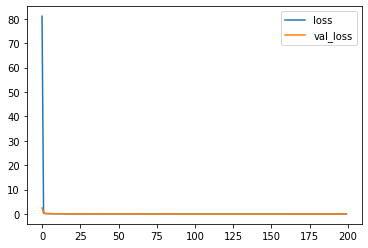

In [35]:
lossDF.plot();

# Lets look some metrics

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
guess = model.predict(X_test)

4882/4882 [==============================] - 4s 756us/step


In [38]:
mean_absolute_error(y_test,guess) 

0.1608184832061776

In [39]:
df.describe()

,maxtempC,mintempC,totalSnow_cm,FeelsLikeC,WindChillC,WindGustKmph,humidity,tempC,winddirDegree,windspeedKmph
count,520701.000000,520701.000000,520701.000000,520701.000000,520701.000000,520701.000000,520701.000000,520701.000000,520701.000000,520701.000000
mean,25.149771,13.562415,0.007927,18.506959,18.305505,17.580615,55.552432,18.851264,145.837275,11.897686
std,10.413156,7.549185,0.150897,10.735242,10.592077,10.256853,19.747118,9.819737,116.356371,7.601362
min,-6.000000,-15.000000,0.000000,-19.000000,-19.000000,0.000000,6.000000,-15.000000,0.000000,0.000000
25%,17.000000,9.000000,0.000000,11.000000,11.000000,10.000000,40.000000,12.000000,30.000000,6.000000
50%,26.000000,15.000000,0.000000,19.000000,19.000000,16.000000,57.000000,19.000000,130.000000,10.000000
75%,34.000000,20.000000,0.000000,26.000000,26.000000,23.000000,71.000000,26.000000,248.000000,16.000000
max,46.000000,30.000000,9.000000,50.000000,46.000000,56.000000,100.000000,46.000000,360.000000,49.000000


In [42]:
mean_absolute_error(y_test,guess)/df.describe()["tempC"]["mean"]

0.008530912487850276

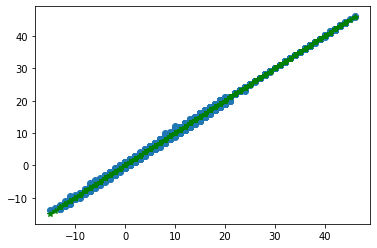

In [43]:
plt.scatter(y_test, guess); 

plt.plot(y_test,y_test , "g-*" ); # Perfect !

In [44]:
model.save("weatherPredcs1.h5")

In [ ]:
# Done !